In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cvdcvd-vd/Social_Network_Ads.csv


# load the dataset

In [2]:
#already pandas library imported, so just load the data
data = pd.read_csv('/kaggle/input/cvdcvd-vd/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#check the distribution
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

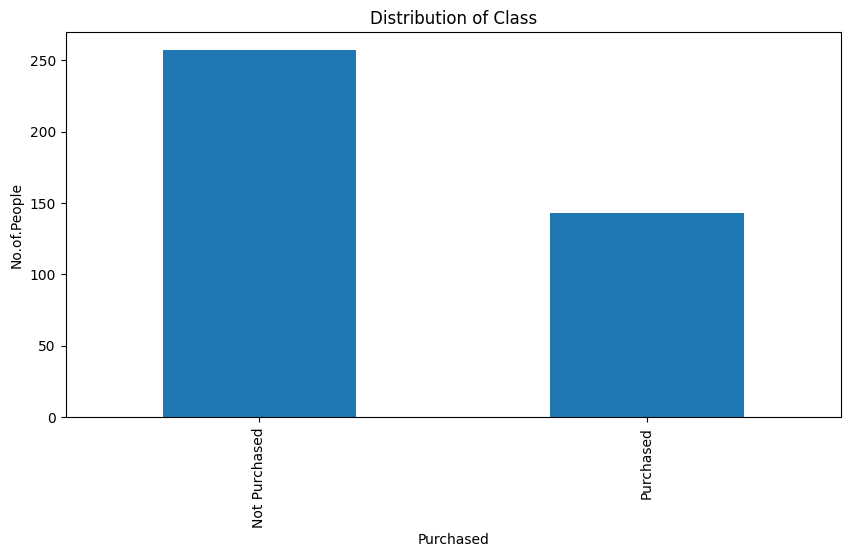

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
data['Purchased'].value_counts().plot(kind='bar')
plt.xticks([0,1],['Not Purchased','Purchased'])
plt.ylabel('No.of.People')
plt.title('Distribution of Class')
plt.show()


In [5]:
#Check, is there any null data or not
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
#split the independent and dependent variables
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [9]:
x

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [11]:
x.shape, y.shape

((400, 3), (400,))

# Data Preprocessing Phase 

In [12]:
#Encode the Gender field
encoded_gender=pd.get_dummies(data=x['Gender'],drop_first=True,dtype='int')
encoded_gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [13]:
x['Male']=encoded_gender
x=x.drop('Gender',axis=1)
x

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [14]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Create the models to predict

In [16]:
classifers={
    'Logistics Regression': LogisticRegression(),
    'K Nearest Neighbors Classifier':KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    'Linear SVC':SVC(kernel = 'linear'),
    'rbf SVC':SVC(kernel = 'rbf'),
    'Decision Tree Classifier': DecisionTreeClassifier(criterion = 'entropy'),
    'Random Forest Classifier':RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),
    'Navies Bayes Classifier': GaussianNB()
}



In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((268, 3), (132, 3), (268,), (132,))

In [18]:
model_names=[]
scores=[]

def applyModels(classifiers):
    for name,model in classifiers.items():
        model.fit(x_train,y_train)
        score = model.score(x_test,y_test)
        model_names.append(name)
        scores.append(score)
        print(f"{name} - Score - {score:.2f}")
        

In [19]:
applyModels(classifers)

Logistics Regression - Score - 0.88
K Nearest Neighbors Classifier - Score - 0.92
Linear SVC - Score - 0.86
rbf SVC - Score - 0.91
Decision Tree Classifier - Score - 0.89
Random Forest Classifier - Score - 0.92
Navies Bayes Classifier - Score - 0.91


**We have pretty much good results but K Nearest Neighbors Classifier and Random Forest Classifier have the best and same score**


# Output and performance metrics

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

knn = classifers['K Nearest Neighbors Classifier']
rfc = classifers['Random Forest Classifier']

y_pred_knn=knn.predict(x_test)
y_pred_rfc=knn.predict(x_test)

print('K Nearest Neighbors Classifier')
print('-'*50)
print(confusion_matrix(y_test,y_pred_knn))
score_knn=accuracy_score(y_test,y_pred_knn)
print('Accuracy : ',str(score_knn))
print('*'*50)
print('Random Forest Classifier')
print('-'*50)
print(confusion_matrix(y_test,y_pred_rfc))
score_rfc=accuracy_score(y_test,y_pred_rfc)
print('Accuracy : ',str(score_rfc))
print('*'*50)


K Nearest Neighbors Classifier
--------------------------------------------------
[[77  7]
 [ 4 44]]
Accuracy :  0.9166666666666666
**************************************************
Random Forest Classifier
--------------------------------------------------
[[77  7]
 [ 4 44]]
Accuracy :  0.9166666666666666
**************************************************


In [21]:
result = pd.DataFrame({
    'Actual Output':y_test,
    'KNN output':y_pred_knn,
    'RFC output':y_pred_rfc
})
result

,Actual Output,KNN output,RFC output
132,0,0,0
309,0,0,0
341,0,0,0
196,0,0,0
246,0,0,0
...,...,...,...
252,1,1,1
350,1,1,1
168,1,1,1
150,0,0,0


In [22]:
testData=sc.inverse_transform(x_test)
test=pd.DataFrame(testData,columns=['Age','Salary','Male'])
test.head()

,Age,Salary,Male
0,30.0,87000.0,1.0
1,38.0,50000.0,0.0
2,35.0,75000.0,1.0
3,30.0,79000.0,0.0
4,35.0,50000.0,0.0


In [23]:
compare_output=test.merge(result,left_index=True,right_index=True)
compare_output

,Age,Salary,Male,Actual Output,KNN output,RFC output
1,38.0,50000.0,0.0,0,0,0
4,35.0,50000.0,0.0,0,0,0
5,27.0,20000.0,1.0,0,0,0
6,31.0,15000.0,0.0,0,0,0
7,36.0,144000.0,1.0,1,1,1
8,18.0,68000.0,0.0,0,0,0
10,30.0,49000.0,1.0,0,0,0
12,37.0,55000.0,1.0,0,0,0
14,20.0,86000.0,1.0,0,0,0
15,32.0,117000.0,0.0,0,0,0
